C:/Users/20115/Desktop/newdataset/train\Covid


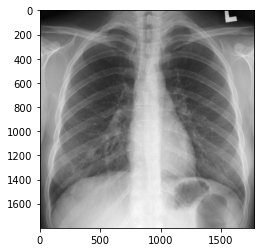

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm


DATADIR1 = "C:/Users/20115/Desktop/Covid_Phenomina_Dataset_train/train"
CATEGORIES = ["Covid","Normal","Phenomena"]

for cat in CATEGORIES:
    path = os.path.join(DATADIR,cat)
    print(path)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array ,cmap="gray")
        plt.show()
        break
    break

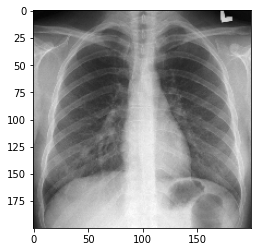

In [4]:
IMG_SIZE = 200

new_array = cv2.resize(img_array ,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array ,cmap="gray")

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 330/330 [00:01<00:00, 242.89it/s]

966


In [5]:
print(len(training_data))

966


In [6]:
import random

random.shuffle(training_data)

In [7]:
for sample in training_data[1:10]:
    print(sample[1])

0
1
2
0
2
1
0
0
2


In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)



X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)

In [9]:
import pickle

pickle_out = open("X1.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y1.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
s = np.arange(X.shape[0])
np.random.shuffle(s)
X_train = X[s]
Y_train = y[s]

x_train, x_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=11
)

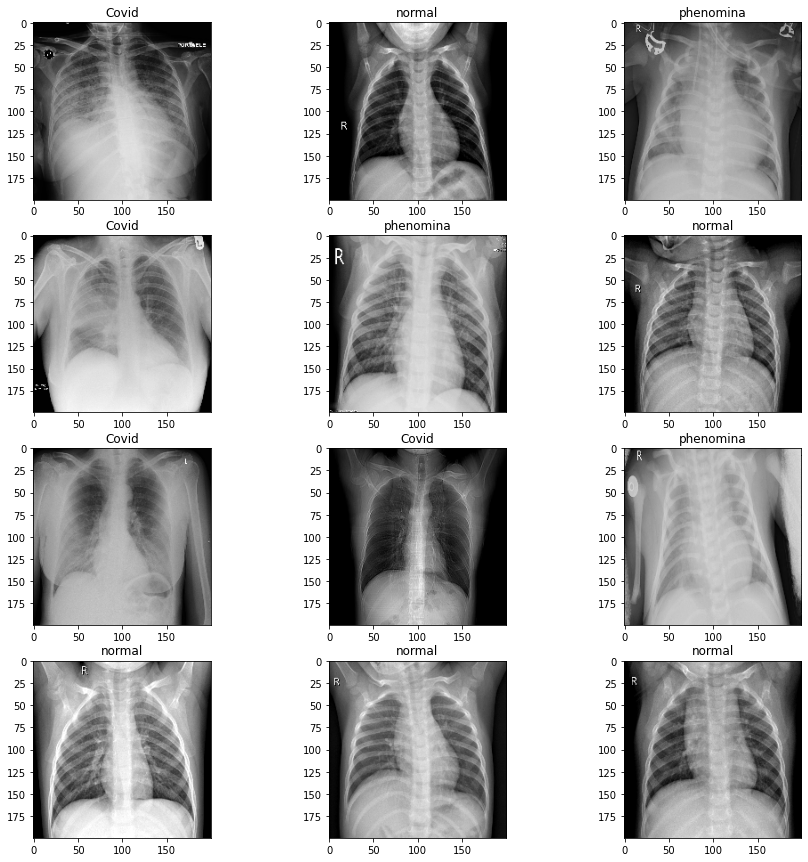

In [11]:
# # Display first 15 images of moles, and how they are classified
w=15
h=15
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3
X=X.squeeze()
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(columns, rows, i)
    if y[i] == 0:
        ax.title.set_text('Covid')
        plt.imshow(X[i], cmap="gray")
    elif y[i] == 1 :
        ax.title.set_text('normal')
        plt.imshow(X[i], cmap="gray")
    else :
        ax.title.set_text('phenomina')
        plt.imshow(X[i], cmap="gray")
    
plt.show()


In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical

pickle_in = open("X1.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y1.pickle","rb")
y = pickle.load(pickle_in)
from tensorflow.keras.utils import to_categorical
X = X/255.0



model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=X.shape[1:]))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu', input_dim=8))
model.add(Dense(3 , activation='softmax'))

optimizer='Adam'
loss='categorical_crossentropy'
metrics=['accuracy']



model.compile(optimizer, loss=loss, metrics=metrics)


history=model.fit(
  X,
  to_categorical(y),
  epochs=20,
  validation_split=0.3)


print(model.summary())
model.save('choosen2.model')


Train on 676 samples, validate on 290 samples
Epoch 1/20
676/676 [==============================] - 119s 177ms/sample - loss: 1.1438 - accuracy: 0.3609 - val_loss: 0.9601 - val_accuracy: 0.6655
Epoch 2/20
676/676 [==============================] - 134s 198ms/sample - loss: 0.6687 - accuracy: 0.7322 - val_loss: 0.4834 - val_accuracy: 0.8207
Epoch 3/20
676/676 [==============================] - 171s 252ms/sample - loss: 0.3410 - accuracy: 0.8935 - val_loss: 0.2240 - val_accuracy: 0.9103
Epoch 4/20
676/676 [==============================] - 164s 242ms/sample - loss: 0.1540 - accuracy: 0.9512 - val_loss: 0.1952 - val_accuracy: 0.9345
Epoch 5/20
676/676 [==============================] - 152s 225ms/sample - loss: 0.2509 - accuracy: 0.9024 - val_loss: 0.3007 - val_accuracy: 0.8828
Epoch 6/20
676/676 [==============================] - 154s 228ms/sample - loss: 0.2420 - accuracy: 0.9231 - val_loss: 0.1997 - val_accuracy: 0.9241
Epoch 7/20
676/676 [==============================] - 155s 230ms/s

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical

pickle_in = open("X1.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y1.pickle","rb")
y = pickle.load(pickle_in)
from tensorflow.keras.utils import to_categorical
X = X/255.0
y_test=to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=X.shape[1:]))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(3 , activation='softmax'))

optimizer='Adam'
loss='categorical_crossentropy'
metrics=['accuracy']



model.compile(optimizer, loss=loss, metrics=metrics)


history=model.fit(
  X,
  to_categorical(y),
  epochs=25,
  validation_split=0.3);


print(model.summary())
model.save('choosen3.model')


Train on 676 samples, validate on 290 samples
Epoch 1/25
676/676 [==============================] - 96s 141ms/sample - loss: 1.1082 - accuracy: 0.3225 - val_loss: 1.0990 - val_accuracy: 0.3241
Epoch 2/25
676/676 [==============================] - 96s 142ms/sample - loss: 1.0977 - accuracy: 0.3491 - val_loss: 1.0634 - val_accuracy: 0.5966
Epoch 3/25
676/676 [==============================] - 104s 154ms/sample - loss: 0.8047 - accuracy: 0.6405 - val_loss: 0.5826 - val_accuracy: 0.7793
Epoch 4/25
 32/676 [>.............................] - ETA: 1:11

KeyboardInterrupt: 

[[1.0000000e+00 1.6079346e-08 3.9817323e-09]]
phenumina


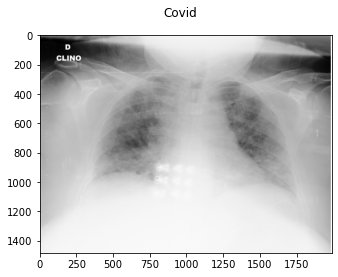

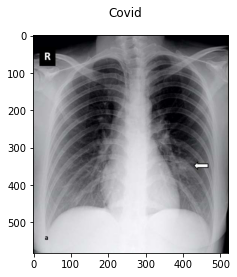

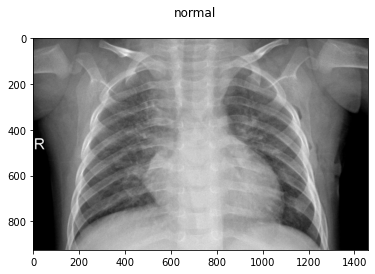

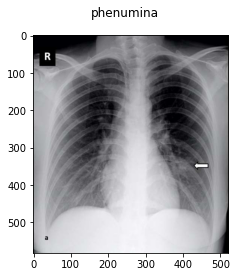

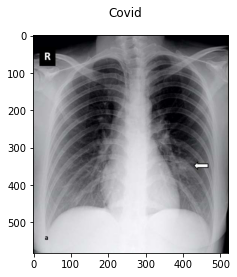

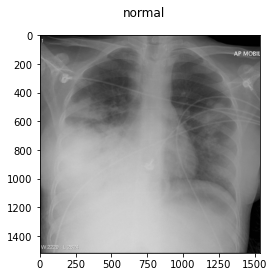

In [203]:
import cv2
import tensorflow as tf
import matplotlib.image as mpimg
CATEGORIES = ["Covid", "normal","phenumina"]


def prepare(filepath):
    IMG_SIZE = 200  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0


model = tf.keras.models.load_model("choosen2.model")

prediction1 = model.predict([prepare('C:/Users/20115/h1.jpeg')])
prediction2 = model.predict([prepare('C:/Users/20115/xray.png')])
prediction3 = model.predict([prepare('C:/Users/20115/norm.jpeg')])
prediction4 = model.predict([prepare('C:/Users/20115/person16_bacteria_54.jpeg')])
prediction5 = model.predict([prepare('C:/Users/20115/sick1.png')])
prediction6 = model.predict([prepare('C:/Users/20115/normal1.jpeg')])

test1 =CATEGORIES[int(prediction1[0][0])]
test2 =CATEGORIES[int(prediction2[0][0])]
test3 =CATEGORIES[int(prediction3[0][0])]
test4 =CATEGORIES[int(prediction4[0][0])]
test5 =CATEGORIES[int(prediction5[0][0])]
test6 =CATEGORIES[int(prediction6[0][0])]
print(prediction1)
pred_name1 = CATEGORIES[np.argmax(prediction1)]
pred_name2 = CATEGORIES[np.argmax(prediction2)]
pred_name3 = CATEGORIES[np.argmax(prediction3)]
pred_name4 = CATEGORIES[np.argmax(prediction4)]
pred_name5 = CATEGORIES[np.argmax(prediction5)]
pred_name6 = CATEGORIES[np.argmax(prediction6)]
print(pred_name)
fig, ax = plt.subplots()
fig.suptitle(pred_name1, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/h1.jpeg')
plt.imshow(np_img ,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name2, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/xray.png')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name3, fontsize=12)
np_img = mpimg.imread('person16_bacteria_54.jpeg')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name4, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/hamada.png')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name5, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/sick1.png')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name6, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/sick2.jpg')
plt.imshow(np_img)

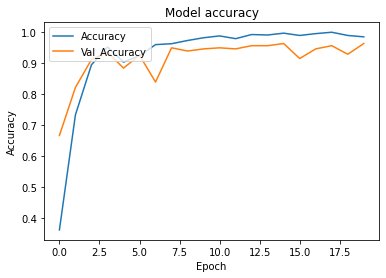

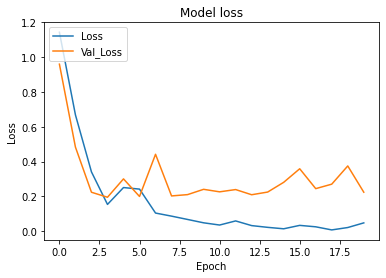

In [204]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

In [202]:
import skimage
from skimage.transform import resize
TEST_DIR ='C:/Users/20115/Desktop/newdataset/test/'
CATEGORIES = ["Covid", "normal","phenumina"]
model = tf.keras.models.load_model("choosen2.model")
X_test , y_test = get_data(TEST_DIR)
Pimages = os.listdir(TEST_DIR )
from matplotlib import pyplot as plt
IMG_SIZE = 200  # 50 in txt-based

test=[]
def plotter(i):
    img_array = cv2.imread(TEST_DIR+"" +Pimages[i], cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    new_arr1=new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0
    print(new_arr1)
    plt.figure(figsize=(10,5))
    plt.imshow(new_array,cmap="gray")
    plt.show()
    prediction=model.predict([new_arr1])
    print(CATEGORIES[int(prediction[i][0])])
    return prediction

for i in range(len(X_test)):
    plotter(i)



NameError: name 'get_data' is not defined

PermissionError: [Errno 13] Permission denied: 'C:/Users/20115/Desktop/newdataset/test/Covid'

In [166]:
TEST_DIR ="C:/Users/20115/Desktop/newdataset/test/"
test_data = []
CATEGORIES = ["Covid", "normal","phenumina"]
def create_test_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(TEST_DIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_arr1=new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
                test_data.append([new_arr1, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))
print(test_data)

100%|██████████| 4/4 [00:00<00:00, 31.67it/s]

14
[[array([[[[132],
         [117],
         [113],
         ...,
         [135],
         [133],
         [254]],

        [[ 97],
         [ 83],
         [ 78],
         ...,
         [120],
         [123],
         [254]],

        [[ 40],
         [ 33],
         [ 35],
         ...,
         [118],
         [114],
         [253]],

        ...,

        [[246],
         [242],
         [243],
         ...,
         [214],
         [210],
         [254]],

        [[245],
         [242],
         [243],
         ...,
         [216],
         [213],
         [254]],

        [[245],
         [243],
         [243],
         ...,
         [220],
         [216],
         [254]]]], dtype=uint8), 0], [array([[[[ 45],
         [ 53],
         [ 55],
         ...,
         [ 85],
         [ 68],
         [ 54]],

        [[ 53],
         [ 58],
         [ 55],
         ...,
         [ 59],
         [ 65],
         [ 64]],

        [[ 51],
         [ 56],
         [ 57],
         ...,
   

In [167]:
X_test = []
y_test = []

for f,l in test_data:
    X_test.append(f)
    y_test.append(l)



X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test =np.array(y_test)
print(y_test)

[0 0 0 0 1 1 1 1 1 1 2 2 2 2]


In [5]:

from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing import image

import numpy as np
import cv2
import os
images = []
CATEGORIES = ["Covid", "normal","phenumina"]
model = tf.keras.models.load_model("choosen2.model")
TEST_DIR ="C:/Users/20115/Desktop/newdataset/test/"
for category in CATEGORIES:  # do dogs and cats
     path = os.path.join(TEST_DIR,category)
     for img in os.listdir(path):
         # create path to dogs and cats
        IMG_SIZE = 200  # 50 in txt-based
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (200, 200))
        new_array=new_array.reshape(-1, 200, 200, 1)/255.0
        images.append(new_array)
        # stack up images list to pass for prediction

images = np.vstack(images)
w=15
h=15
fig=plt.figure(figsize=(25, 25))
columns = 4
rows = 3
X_test=X_test/255.0
X_Test2=X_test.squeeze()

i=0
prop_class=[]
mis_class=[]
classes = model.predict(images)

print(len(y_test))
for i in range(len(y_test)):
    if(np.argmax(classes[i]))==y_test[i]:
        prop_class.append(i)
        print(CATEGORIES[np.argmax(classes[i])])
        print(CATEGORIES[y_test[i]])

i=0
for i in range(len(y_test)):
    if(not CATEGORIES[np.argmax(classes[i])])==y_test[i]:
        mis_class.append(i)
# # Display first 8 images of benign
w=60
h=40
fig=plt.figure(figsize=(25, 25))
columns = 4
rows = 4

def Transfername(namecode):
    if namecode==0:
        return "Covid"
    elif namecode==1:
        return "normal"
    elif namecode==2 :
        return "phenumona"
    

for i in range(len(prop_class)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ CATEGORIES[np.argmax(classes[prop_class[i]])]
                       +"\n"+"Actual result: ",color="r"+ CATEGORIES[y_test[prop_class[i]]])
    plt.imshow(X_Test2[prop_class[i]], cmap="gray")
plt.show()

NameError: name 'X_test' is not defined

<Figure size 1800x1800 with 0 Axes>